#  Milk data analysis and Clustering the Customers


### Customer segmentation is important for businesses to understand their target audience. Different advertisements can be curated and sent to different audience segments based on their demographic profile, interests, and affluence level.

## Context

Distributors use our sales force automation tools in order to help them track their sales, improve their operations and increase their top line.

We would like to help these distributors maximize their profits by allowing them to identify which merchants they should target.

The specific distributor that we will be analysing is Cow and Buffalo Milk company. They produce dairy products for the entire country. Below is a list of merchants that they service along with meta data that could be useful in determining which of the merchants they should invest resources in.

## Problem

1. **Make use of the merchant data set below in order to develop models that will help Cow and Buffalo Milk company target the right customers. The goal is to help Cow and Buffalo Milk company not only increase sales but also to become more efficient in allocating advertising spend.**
2. **Given the payment history that the merchant has and the cities that the merchant operates in, create a credit scoring algorithm that will help the distributor figure out which are the most creditworthy merchants and which ones are not.**

## Dataset features

**The dataset has the following features:**

- **Merchant Id** - This is the unique Identification number that is given to a merchant
- **Annual Revenue** - This is the annual income of the merchant
- **Spending score** - It is the score(out of 100) given to a merchant by Ramani.io, based on the money spent on distributor products and the behavior of the customer.
- **City** - The city that the merchant is located in
- **Most Purchased Product** - In terms of money spent on a particular product, this is the most popular product for that specific merchant. Therefore, this is the most purchased product by that merchant from Cow and Buffalo Milk company.
- **Payment score -** It is the score(out of 5) given to a merchant by a Counsultant, based on the ability for the merchant to repay inventory that is purchased on credit. A score of 5 is great , a score of 1 is poor.

## Constraints

- Language: Python,R, Scala
- Frameworks/libraries: Tensorflow, Keras, Apache Spark, pandas, numpy, matplotlib, sklearn


## Submission

When you have completed the project, please upload the code to a repository of your choice and share the clone link with **me**

The submission should include a section on how to run the code as well as a write up on what you discovered and how you would  you advise Cow and Buffalo Milk company on which merchants to target.




In [2]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", size=14)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the csv and print the first 5 rows
df = pd.read_excel("/content/drive/MyDrive/Customer_Segmentation/data.xlsx")
df.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2


In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Merchant Id', 'Annual Revenue (k$)', 'Spending Score (1-100)', 'City',
       'Most Purchased Product', 'Repayment Score 1-5'],
      dtype='object')

In [7]:
df.rename(columns={'Annual Revenue (k$)':'Annual_Revenue',
                   'Spending Score (1-100)':'Spending_Score',
                   'Repayment Score 1-5': 'Repayment_Score',
                   'Most Purchased Product':'Most_Purchased_Product',
                   'Merchant Id':'Merchant_Id'
                  },inplace=True)

In [8]:
df.describe()

,Merchant_Id,Annual_Revenue,Spending_Score,Repayment_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,3.990000
std,57.879185,26.264721,25.823522,0.850598
min,1.000000,15.000000,1.000000,1.000000
25%,50.750000,41.500000,34.750000,4.000000
50%,100.500000,61.500000,50.000000,4.000000
75%,150.250000,78.000000,73.000000,5.000000
max,200.000000,137.000000,99.000000,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant_Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment_Score         200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [10]:
# 200 different merchants
df['Merchant_Id'].nunique()

200

In [11]:
# how many cities and count of merchants operating under each
df['City'].value_counts()

City
Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: count, dtype: int64

In [12]:
# how many products and count of merchants using each
df['Most_Purchased_Product'].value_counts()

Most_Purchased_Product
Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: count, dtype: int64

In [13]:
#Checking for null values
df.isnull().sum()

Merchant_Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Repayment_Score           0
dtype: int64

In [14]:
#Looking for null values
# df.isna().sum()

Inertia is used as a measure of how internally coherent the clusters are. Lower inertia indicates that the points within each cluster are closer to their centroid, suggesting better-defined clusters.

inertia aka within-cluster sum of squares (WCSS), measures the compactness of the clusters

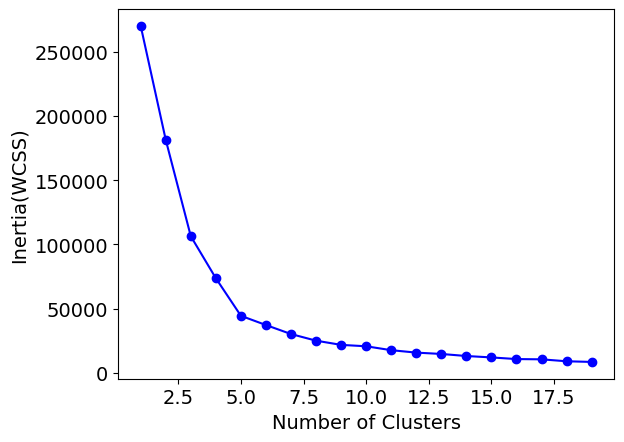

In [15]:
#Creating values for the elbow
X = df.loc[:,["Annual_Revenue", "Spending_Score"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)      # inertia aka within-cluster sum of squares (WCSS), measures the compactness of the clusters

#Plotting the elbow
plt.plot(k , inertia , 'bo-')             # number of clusters (k) against the inertia values. rate of decrease in inertia as the number of clusters increases.
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia(WCSS)')
plt.show()

In [16]:
# means_k.labels_

In [17]:
# K-means clustering(assigns cluster labels to each data point, and computes the cluster centroids).
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 30)
y_kmeans = kmeans.fit_predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [18]:
# kmeans.labels_

In [19]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 1 6 5 6 5 6
 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [20]:
len(y_kmeans)

200

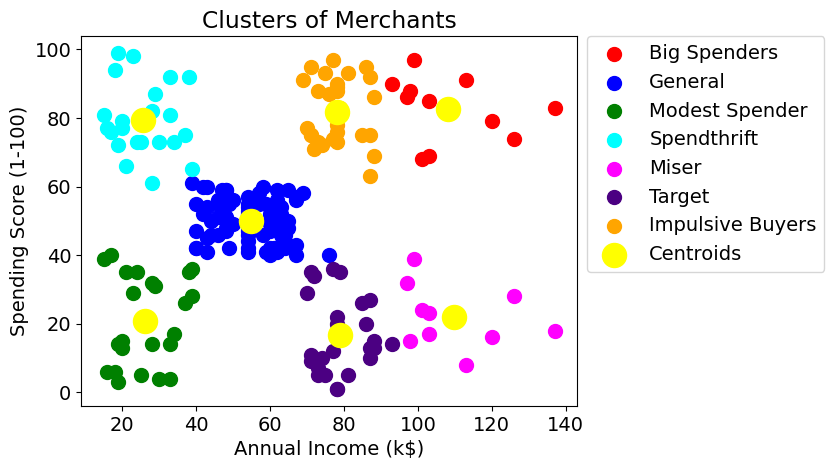

In [21]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0]['Annual_Revenue'], X[y_kmeans == 0]['Spending_Score'], s = 100, c = 'red', label = 'Big Spenders')
plt.scatter(X[y_kmeans == 1]['Annual_Revenue'], X[y_kmeans == 1]['Spending_Score'], s = 100, c = 'blue', label = 'General')
plt.scatter(X[y_kmeans == 2]['Annual_Revenue'], X[y_kmeans == 2]['Spending_Score'], s = 100, c = 'green', label = 'Modest Spender')
plt.scatter(X[y_kmeans == 3]['Annual_Revenue'], X[y_kmeans == 3]['Spending_Score'], s = 100, c = 'cyan', label = 'Spendthrift')
plt.scatter(X[y_kmeans == 4]['Annual_Revenue'], X[y_kmeans == 4]['Spending_Score'], s = 100, c = 'magenta', label = 'Miser')
plt.scatter(X[y_kmeans == 5]['Annual_Revenue'], X[y_kmeans == 5]['Spending_Score'], s = 100, c = 'indigo', label = 'Target')
plt.scatter(X[y_kmeans == 6]['Annual_Revenue'], X[y_kmeans == 6]['Spending_Score'], s = 100, c = 'orange', label = 'Impulsive Buyers')

plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Merchants')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [22]:
# df.loc[:,"Cluster_Number"] = y_kmeans

In [23]:
df["Cluster_Number"] = y_kmeans

In [24]:
# describes the nature of each cluster based on the values
Cluster_Nature = []

for row in df['Cluster_Number']:
    if row == 0:
        Cluster_Nature.append('Big Spenders')
    elif row == 1:
        Cluster_Nature.append('General') # Miser is the one who hoards wealth and spends a little money
    elif row == 2: Cluster_Nature.append('Modest Spender')
    elif row == 3: Cluster_Nature.append('Spendthrift') # spendthrift is the one who spends money in an extravagant
    elif row == 4:  Cluster_Nature.append('Miser')
    elif row == 5:  Cluster_Nature.append('Target')
    elif row == 6:  Cluster_Nature.append('Impulsive Buyers')
    else: Cluster_Nature.append('Outlier')

df['Cluster_Nature'] = Cluster_Nature

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant_Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment_Score         200 non-null    int64 
 6   Cluster_Number          200 non-null    int32 
 7   Cluster_Nature          200 non-null    object
dtypes: int32(1), int64(4), object(3)
memory usage: 11.8+ KB


In [26]:
df.describe()

,Merchant_Id,Annual_Revenue,Spending_Score,Repayment_Score,Cluster_Number
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,3.990000,2.670000
std,57.879185,26.264721,25.823522,0.850598,1.987676
min,1.000000,15.000000,1.000000,1.000000,0.000000
25%,50.750000,41.500000,34.750000,4.000000,1.000000
50%,100.500000,61.500000,50.000000,4.000000,2.000000
75%,150.250000,78.000000,73.000000,5.000000,5.000000
max,200.000000,137.000000,99.000000,5.000000,6.000000


In [27]:
df.head()

,Merchant_Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
0,1,15,39,Mtwara,Mtindi 500ml,1,2,Modest Spender
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,3,2,Modest Spender
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,2,Modest Spender


In [28]:
# sum of all numeric columns values by Most_Purchased_Product
df.groupby(['Most_Purchased_Product']).sum()

,Merchant_Id,Annual_Revenue,Spending_Score,City,Repayment_Score,Cluster_Number,Cluster_Nature
Most_Purchased_Product,,,,,,,
Fresh Milk 1ltr,6118,4040,3777,MoshiMoshiMoshiMoshiMoshiMoshiMoshiMoshiMoshiM...,304,80,Modest SpenderGeneralModest SpenderSpendthrift...
Fresh Milk 250ml,462,527,1681,Zanzibar CityZanzibar CityZanzibar CityZanziba...,85,63,SpendthriftSpendthriftSpendthriftSpendthriftSp...
Mtindi 250ml,13079,7018,4165,Dar es SalaamDar es SalaamDar es SalaamDar es ...,326,349,GeneralGeneralGeneralGeneralGeneralImpulsive B...
Mtindi 500ml,441,527,417,MtwaraMtwaraMtwaraMtwaraMtwaraMtwaraMtwaraMtwa...,83,42,Modest SpenderModest SpenderModest SpenderMode...


<Axes: >

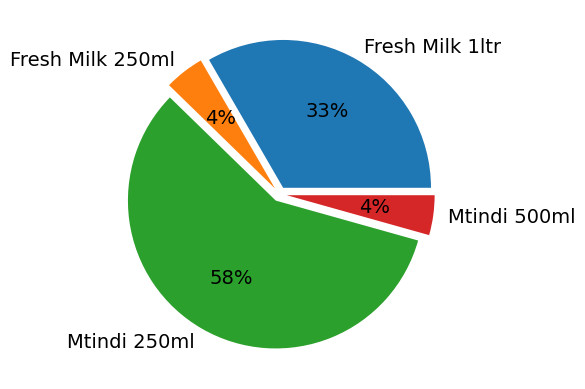

In [29]:
# sum of Annual_Revenue genrated by Most_Purchased_Product
explode = (0.05, 0.05, 0.05,0.05)

df.groupby(['Most_Purchased_Product']).sum().plot(kind='pie', y='Annual_Revenue', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

<Axes: >

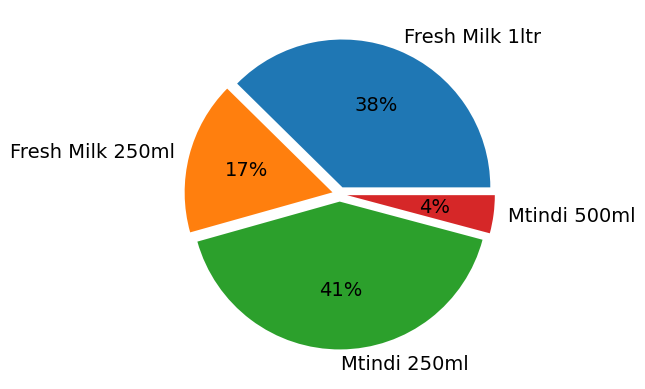

In [30]:
# sum of Spending_Score genrated by Most_Purchased_Product
explode = (0.05, 0.05, 0.05,0.05)

df.groupby(['Most_Purchased_Product']).sum().plot(kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

In [31]:
df.groupby(['City']).sum()

,Merchant_Id,Annual_Revenue,Spending_Score,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature
City,,,,,,,
Dar es Salaam,13079,7018,4165,Mtindi 250mlMtindi 250mlMtindi 250mlMtindi 250...,326,349,GeneralGeneralGeneralGeneralGeneralImpulsive B...
Moshi,6118,4040,3777,Fresh Milk 1ltrFresh Milk 1ltrFresh Milk 1ltrF...,304,80,Modest SpenderGeneralModest SpenderSpendthrift...
Mtwara,441,527,417,Mtindi 500mlMtindi 500mlMtindi 500mlMtindi 500...,83,42,Modest SpenderModest SpenderModest SpenderMode...
Zanzibar City,462,527,1681,Fresh Milk 250mlFresh Milk 250mlFresh Milk 250...,85,63,SpendthriftSpendthriftSpendthriftSpendthriftSp...


<Axes: >

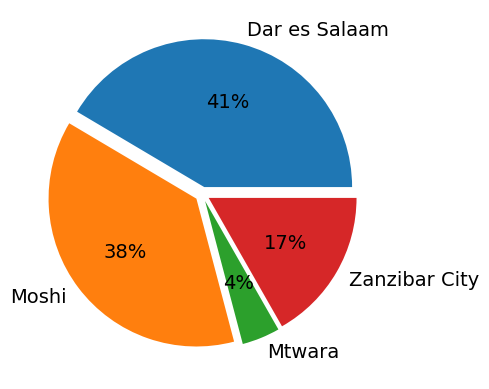

In [32]:
# sum of Spending_Score genrated by city
explode = (0.05, 0.05, 0.05,0.05)

# Plotting the pie chart for above dataframe
df.groupby(['City']).sum().plot(kind='pie', y='Spending_Score', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

<Axes: >

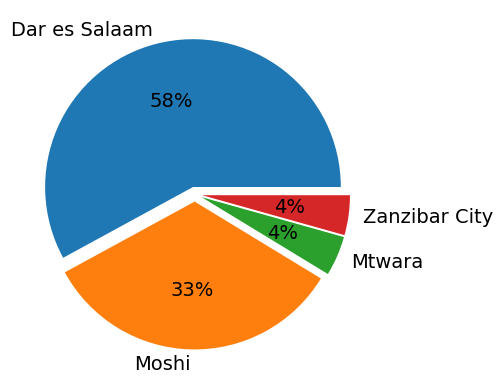

In [33]:
# sum of Annual_Revenue genrated by city
explode = (0.05, 0.05, 0.05,0.05)

df.groupby(['City']).sum().plot(kind='pie', y='Annual_Revenue', autopct='%1.0f%%', explode=explode, legend = False,ylabel='')

Text(0.5, 1.0, 'Most_Purchased_Product')

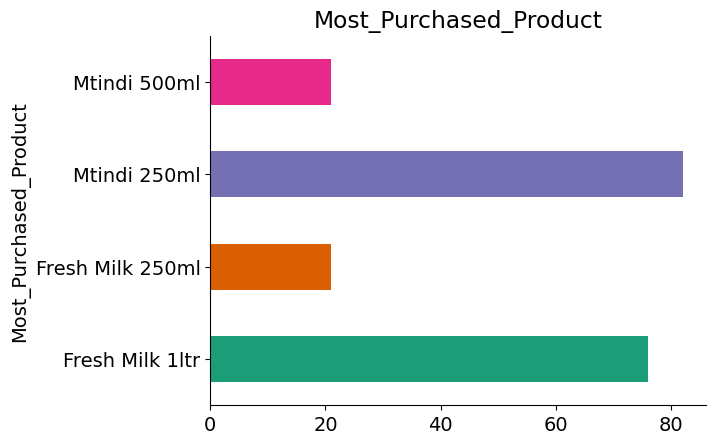

In [34]:
# showing the frequency or count for each unqiue value in the column
df.groupby('Most_Purchased_Product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Most_Purchased_Product')

Text(0.5, 1.0, 'Merchant_Id vs Annual_Revenue')

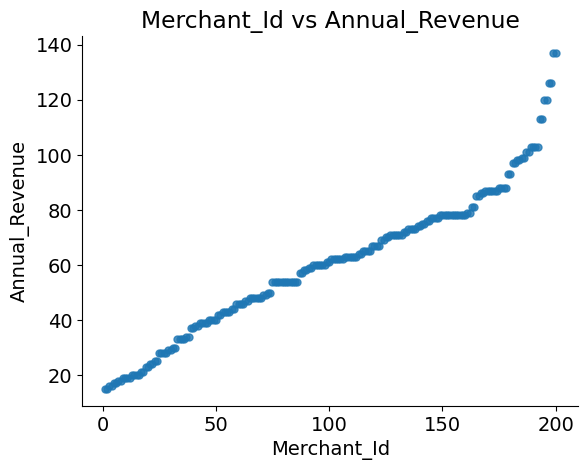

In [35]:
# relationship between merchant IDs and annual revenue
df.plot(kind='scatter', x='Merchant_Id', y='Annual_Revenue', s=25, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Merchant_Id vs Annual_Revenue')

In [36]:
df['Repayment_Score'].describe()

count    200.000000
mean       3.990000
std        0.850598
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Repayment_Score, dtype: float64

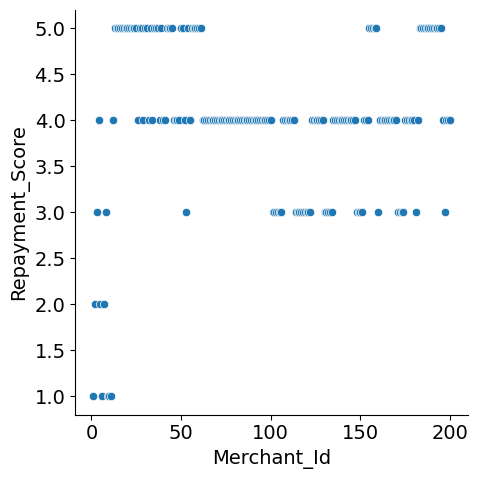

In [37]:
# relationship between merchant IDs and repayment scores
sns.relplot(data=df, x="Merchant_Id", y="Repayment_Score")
plt.show()

Text(0.5, 1.0, 'Spending_Score vs Repayment_Score')

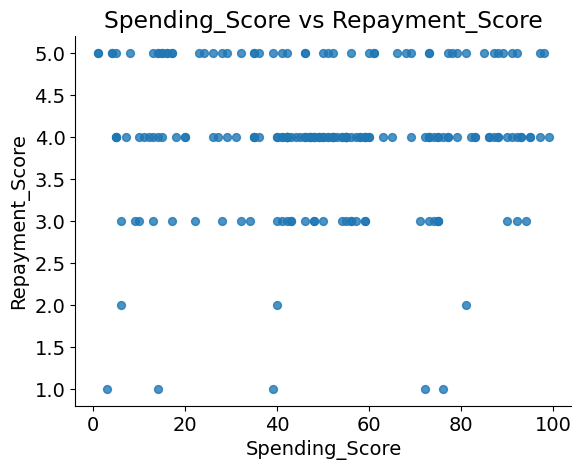

In [38]:
#  relationship between spending scores and repayment scores
df.plot(kind='scatter', x='Spending_Score', y='Repayment_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Spending_Score vs Repayment_Score')

In [39]:
# Define score thresholds for segmentation
high_threshold = 4
moderate_threshold = 2

# Segment merchants based on repayment scores
def segment_merchants(score):
    if score >= high_threshold:
        return 'Highly Creditworthy'
    elif score >= moderate_threshold:
        return 'Moderately Creditworthy'
    else:
        return 'Not Creditworthy'

# Apply segmentation function to create a new column
df['Creditworthiness'] = df['Repayment_Score'].apply(segment_merchants)

# Display the segmented DataFrame
print(df)

     Merchant_Id  Annual_Revenue  Spending_Score           City  \
0              1              15              39         Mtwara   
1              2              15              81  Zanzibar City   
2              3              16               6         Mtwara   
3              4              16              77  Zanzibar City   
4              5              17              40         Mtwara   
..           ...             ...             ...            ...   
195          196             120              79  Dar es Salaam   
196          197             126              28  Dar es Salaam   
197          198             126              74  Dar es Salaam   
198          199             137              18  Dar es Salaam   
199          200             137              83  Dar es Salaam   

    Most_Purchased_Product  Repayment_Score  Cluster_Number  Cluster_Nature  \
0             Mtindi 500ml                1               2  Modest Spender   
1         Fresh Milk 250ml           

<Axes: xlabel='count', ylabel='Creditworthiness'>

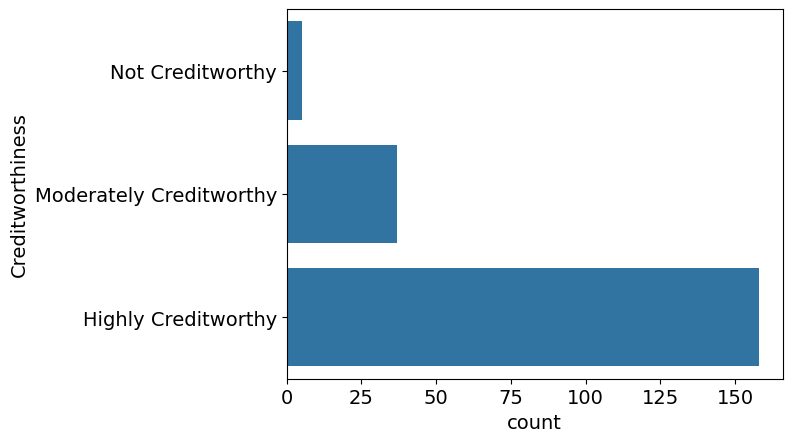

In [40]:
# showing the frequency or count of each unique value in the column
sns.countplot(data=df['Creditworthiness'])

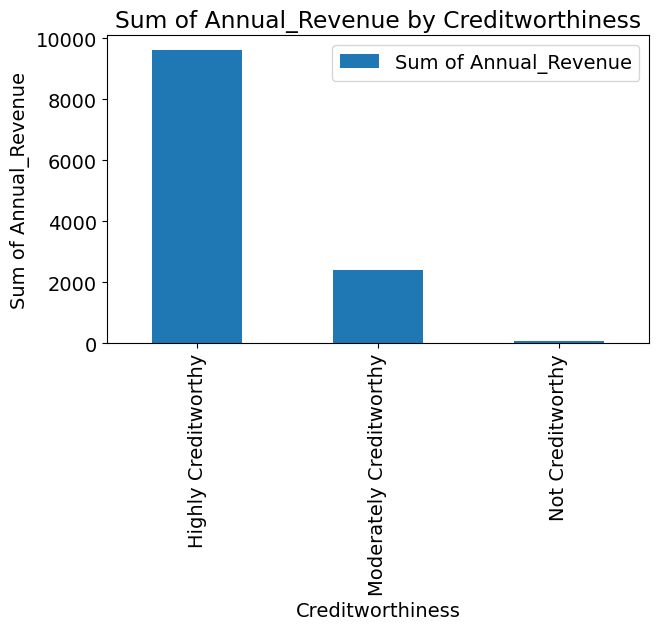

In [41]:
# Group the DataFrame by 'Creditworthiness' and calculate the sum of 'Annual_Revenue'
grouped_df = df.groupby('Creditworthiness')['Annual_Revenue'].sum()

# Plot the grouped bar chart
grouped_df.plot(kind='bar', figsize=(7, 4), rot=0)
plt.xlabel('Creditworthiness')
plt.xticks(rotation=90)
plt.ylabel('Sum of Annual_Revenue')
plt.title('Sum of Annual_Revenue by Creditworthiness')
plt.legend(['Sum of Annual_Revenue'])
plt.show()

In [46]:
# Group the DataFrame by 'Creditworthiness'
grouped_df = df.groupby('Creditworthiness')

# Create an empty list to store the top 10 customers from each creditworthy type
top_customers_list = []

# Iterate over each group
for name, group in grouped_df:
    # Sort the customers by annual revenue in descending order
    sorted_group = group.sort_values(by='Annual_Revenue', ascending=False)
    # Select the top 10 customers
    top_10_customers = sorted_group.head(10)
    # Append the top 10 customers to the top_customers_list
    top_customers_list.append(top_10_customers)

# Concatenate the list of DataFrames into a single DataFrame
top_customers_df = pd.concat(top_customers_list)

# Plot the annual revenue for the selected top 10 customers
# plt.figure(figsize=(10, 6))
# for name, group in top_customers_df.groupby('Creditworthiness'):
#     plt.plot(group.index, group['Annual_Revenue'], marker='o', label=name)

# plt.xlabel('Merchant_ID')
# plt.ylabel('Annual_Revenue')
# plt.title('Top 10 Customers by Creditworthiness')
# plt.xticks(rotation=45)
# plt.legend(title='Creditworthiness')
# plt.grid(True)
# plt.show()


import plotly.express as px

# Plot the annual revenue for the top 10 customers from each category using Plotly scatter plot
fig = px.scatter(top_customers_df, x='Merchant_Id', y='Annual_Revenue', color='Creditworthiness',
                 hover_data=['Merchant_Id'], labels={'Merchant_Id','Annual_Revenue'},
                 title='Top 10 Customers by Creditworthiness')
fig.show()

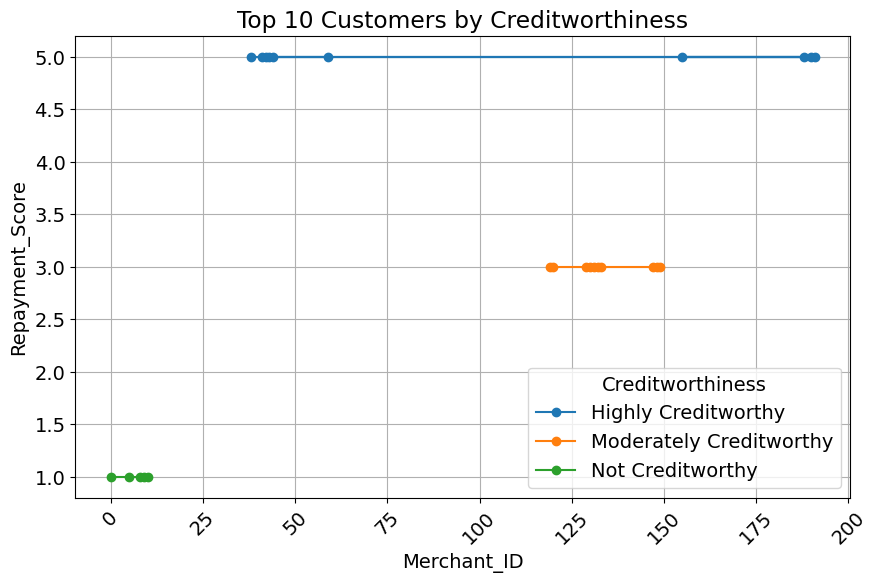

In [47]:
# Group the DataFrame by 'Creditworthiness'
grouped_df = df.groupby('Creditworthiness')

# Create an empty list to store the top 10 customers from each creditworthy type
top_customers_list = []

# Iterate over each group
for name, group in grouped_df:
    # Sort the customers by annual revenue in descending order
    sorted_group = group.sort_values(by='Repayment_Score', ascending=False)
    # Select the top 10 customers
    top_10_customers = sorted_group.head(10)
    # Append the top 10 customers to the top_customers_list
    top_customers_list.append(top_10_customers)

# Concatenate the list of DataFrames into a single DataFrame
top_customers_df = pd.concat(top_customers_list)

# Plot the annual revenue for the selected top 10 customers
plt.figure(figsize=(10, 6))
for name, group in top_customers_df.groupby('Creditworthiness'):
    plt.plot(group.index, group['Repayment_Score'], marker='o', label=name)

plt.xlabel('Merchant_ID')
plt.ylabel('Repayment_Score')
plt.title('Top 10 Customers by Creditworthiness')
plt.xticks(rotation=45)
plt.legend(title='Creditworthiness')
plt.grid(True)
plt.show()


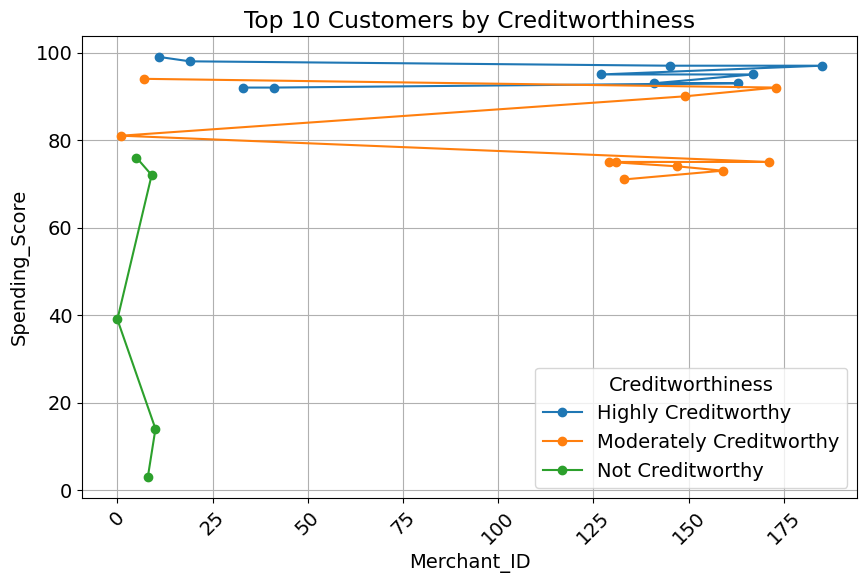

In [48]:
# Group the DataFrame by 'Creditworthiness'
grouped_df = df.groupby('Creditworthiness')

# Create an empty list to store the top 10 customers from each creditworthy type
top_customers_list = []

# Iterate over each group
for name, group in grouped_df:
    # Sort the customers by annual revenue in descending order
    sorted_group = group.sort_values(by='Spending_Score', ascending=False)
    # Select the top 10 customers
    top_10_customers = sorted_group.head(10)
    # Append the top 10 customers to the top_customers_list
    top_customers_list.append(top_10_customers)

# Concatenate the list of DataFrames into a single DataFrame
top_customers_df = pd.concat(top_customers_list)

# Plot the annual revenue for the selected top 10 customers
plt.figure(figsize=(10, 6))
for name, group in top_customers_df.groupby('Creditworthiness'):
    plt.plot(group.index, group['Spending_Score'], marker='o', label=name)

plt.xlabel('Merchant_ID')
plt.ylabel('Spending_Score')
plt.title('Top 10 Customers by Creditworthiness')
plt.xticks(rotation=45)
plt.legend(title='Creditworthiness')
plt.grid(True)
plt.show()

In [49]:
# # Plot the annual revenue, repayment score, and spending score for the selected top 10 customers
# plt.figure(figsize=(10, 6))

# # Iterate over each group
# for name, group in top_customers_df.groupby('Creditworthiness'):
#     # Plot the annual revenue
#     plt.plot(group.index, group['Annual_Revenue'], marker='o', label=f'{name} - Annual_Revenue')
#     # Plot the repayment score
#     plt.plot(group.index, group['Repayment_Score'], marker='s', label=f'{name} - Repayment_Score')
#     # Plot the spending score
#     plt.plot(group.index, group['Spending_Score'], marker='^', label=f'{name} - Spending_Score')

# plt.xlabel('Merchant ID')
# plt.ylabel('Score/Annual_Revenue')
# plt.title('Top 10 Customers by Creditworthiness')
# plt.xticks(rotation=45)
# plt.legend(title='Creditworthiness',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.grid(True)
# plt.show()

In [50]:
import plotly.express as px

# Create a DataFrame for the scatter plot
scatter_df = top_customers_df.melt(id_vars=['Merchant_Id', 'Creditworthiness'],
                                   value_vars=['Annual_Revenue', 'Repayment_Score', 'Spending_Score'],
                                   var_name='Metric', value_name='Score/Annual_Revenue')

# Plot the scatter plot using Plotly
fig = px.scatter(scatter_df, x='Merchant_Id', y='Score/Annual_Revenue', color='Creditworthiness',
                 hover_data=['Merchant_Id', 'Metric'], labels={'Merchant_ID': 'Merchant ID',
                                                               'Score/Annual_Revenue': 'Score/Annual Revenue'},
                 title='Top 10 Customers by Creditworthiness',
                 facet_col='Metric', facet_col_wrap=1,
                 category_orders={'Metric': ['Annual_Revenue', 'Repayment_Score', 'Spending_Score']})

fig.update_layout(legend_title='Creditworthiness')
fig.show()

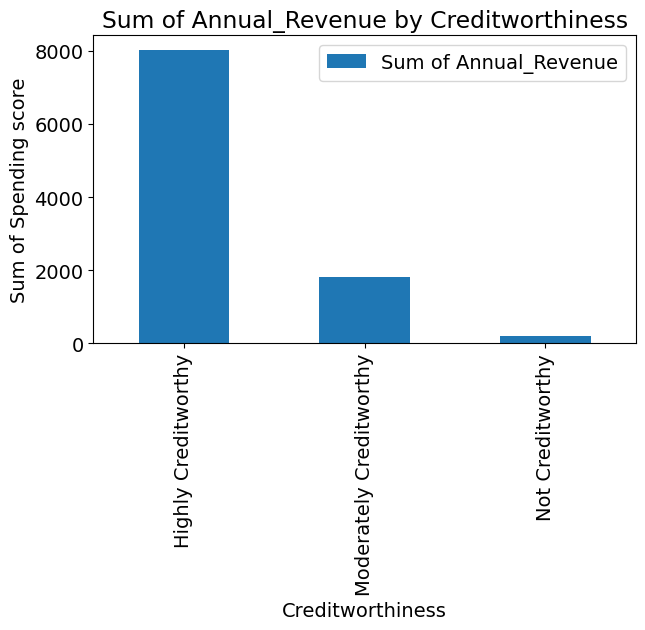

In [51]:
# Group the DataFrame by 'Creditworthiness' and calculate the sum of 'Annual_Revenue'
grouped_df = df.groupby('Creditworthiness')['Spending_Score'].sum()

# Plot the grouped bar chart
grouped_df.plot(kind='bar', figsize=(7, 4), rot=0)
plt.xlabel('Creditworthiness')
plt.ylabel('Sum of Spending score')
plt.xticks(rotation=90)
plt.title('Sum of Annual_Revenue by Creditworthiness')
plt.legend(['Sum of Annual_Revenue'])
plt.show()

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing
# Drop irrelevant columns if any

df_processed = df.drop(columns=['Merchant_Id', 'Most_Purchased_Product','Cluster_Nature'])

# Encode categorical variables
df_processed = pd.get_dummies(df_processed, columns=['City'])

# Split data into features (X) and target variable (y)
X = df_processed.drop(columns=['Creditworthiness'])
y = df_processed['Creditworthiness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Model Evaluation
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.975
Classification Report:
                         precision    recall  f1-score   support

    Highly Creditworthy       1.00      1.00      1.00        33
Moderately Creditworthy       0.86      1.00      0.92         6
       Not Creditworthy       0.00      0.00      0.00         1

               accuracy                           0.97        40
              macro avg       0.62      0.67      0.64        40
           weighted avg       0.95      0.97      0.96        40



In [53]:
# showing the frequency or count of each unique value in the column
df['Cluster_Nature'].value_counts()

Cluster_Nature
General             79
Impulsive Buyers    28
Target              27
Modest Spender      23
Spendthrift         22
Big Spenders        11
Miser               10
Name: count, dtype: int64

In [54]:
# showing unique value in the column
uniqueValues = df['Cluster_Nature'].unique()
print(uniqueValues)

['Modest Spender' 'Spendthrift' 'General' 'Impulsive Buyers' 'Target'
 'Big Spenders' 'Miser']


Text(0.5, 1.0, 'Cluster_Nature')

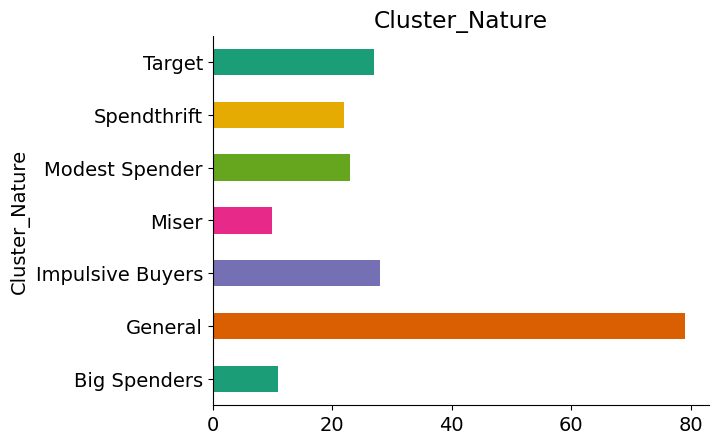

In [55]:
# represents the count of occurrences of a specific category
df.groupby('Cluster_Nature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Cluster_Nature')

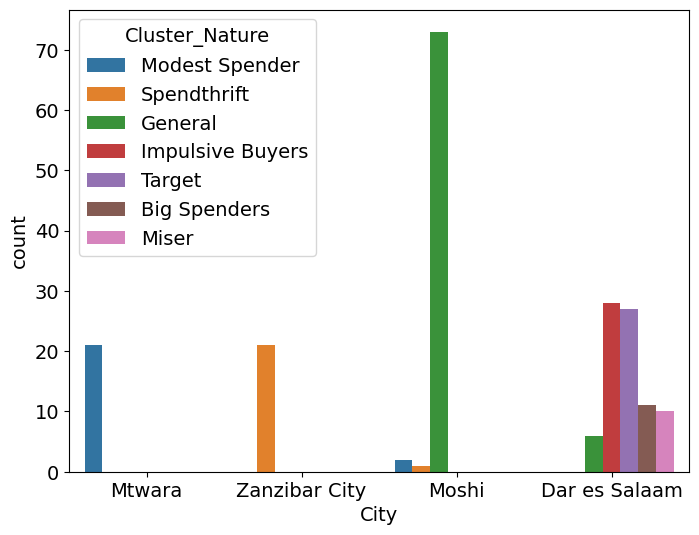

In [56]:
# City and Cluster_Nature
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='City', hue='Cluster_Nature')
plt.show()

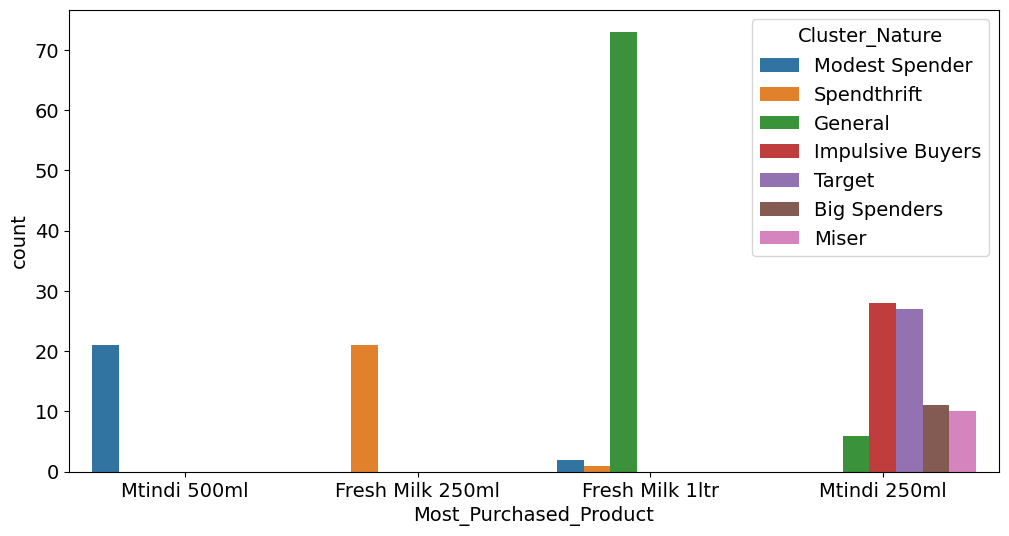

In [57]:
#  relationship between Most_Purchased_Product and Cluster_Nature
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Most_Purchased_Product', hue='Cluster_Nature')
plt.show()

Text(0.5, 1.0, 'Most_Purchased_Product vs Merchant_Id')

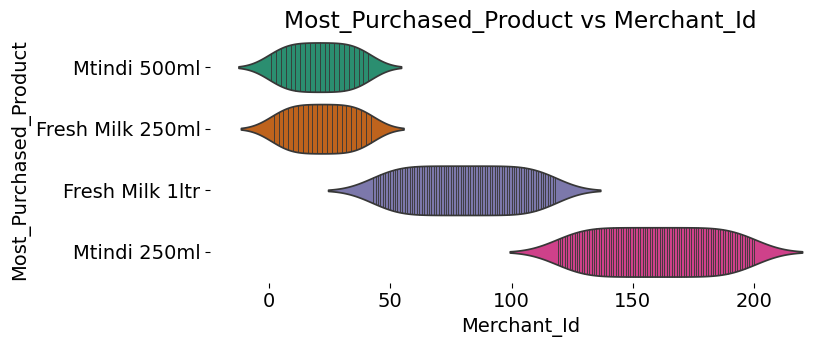

In [58]:
# @title Most_Purchased_Product vs Merchant Id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (8, 0.8 * len(df['Most_Purchased_Product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Merchant_Id', y='Most_Purchased_Product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Most_Purchased_Product vs Merchant_Id')

In [59]:
target1_df = df.loc[df['Cluster_Nature'] == 'Miser']

In [60]:
target1_df.head()

,Merchant_Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature,Creditworthiness
180,181,97,32,Dar es Salaam,Mtindi 250ml,3,4,Miser,Moderately Creditworthy
182,183,98,15,Dar es Salaam,Mtindi 250ml,5,4,Miser,Highly Creditworthy
184,185,99,39,Dar es Salaam,Mtindi 250ml,5,4,Miser,Highly Creditworthy
186,187,101,24,Dar es Salaam,Mtindi 250ml,5,4,Miser,Highly Creditworthy
188,189,103,17,Dar es Salaam,Mtindi 250ml,5,4,Miser,Highly Creditworthy


In [61]:
target1_df['City'].unique()

array(['Dar es Salaam'], dtype=object)

In [62]:
target1_df['Most_Purchased_Product'].unique()

array(['Mtindi 250ml'], dtype=object)

In [63]:
target2_df = df.loc[df['Cluster_Nature'] == 'Target']

In [64]:
target2_df.head()

,Merchant_Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature,Creditworthiness
124,125,70,29,Dar es Salaam,Mtindi 250ml,4,5,Target,Highly Creditworthy
126,127,71,35,Dar es Salaam,Mtindi 250ml,4,5,Target,Highly Creditworthy
128,129,71,11,Dar es Salaam,Mtindi 250ml,4,5,Target,Highly Creditworthy
130,131,71,9,Dar es Salaam,Mtindi 250ml,3,5,Target,Moderately Creditworthy
132,133,72,34,Dar es Salaam,Mtindi 250ml,3,5,Target,Moderately Creditworthy


In [65]:
target2_df['City'].unique()

array(['Dar es Salaam'], dtype=object)

In [66]:
target2_df['Most_Purchased_Product'].unique()

array(['Mtindi 250ml'], dtype=object)

In [67]:
df.groupby(['City']).sum()

,Merchant_Id,Annual_Revenue,Spending_Score,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature,Creditworthiness
City,,,,,,,,
Dar es Salaam,13079,7018,4165,Mtindi 250mlMtindi 250mlMtindi 250mlMtindi 250...,326,349,GeneralGeneralGeneralGeneralGeneralImpulsive B...,Moderately CreditworthyModerately Creditworthy...
Moshi,6118,4040,3777,Fresh Milk 1ltrFresh Milk 1ltrFresh Milk 1ltrF...,304,80,Modest SpenderGeneralModest SpenderSpendthrift...,Highly CreditworthyHighly CreditworthyHighly C...
Mtwara,441,527,417,Mtindi 500mlMtindi 500mlMtindi 500mlMtindi 500...,83,42,Modest SpenderModest SpenderModest SpenderMode...,Not CreditworthyModerately CreditworthyModerat...
Zanzibar City,462,527,1681,Fresh Milk 250mlFresh Milk 250mlFresh Milk 250...,85,63,SpendthriftSpendthriftSpendthriftSpendthriftSp...,Moderately CreditworthyHighly CreditworthyNot ...


In [68]:
df.groupby(['Most_Purchased_Product']).sum()

,Merchant_Id,Annual_Revenue,Spending_Score,City,Repayment_Score,Cluster_Number,Cluster_Nature,Creditworthiness
Most_Purchased_Product,,,,,,,,
Fresh Milk 1ltr,6118,4040,3777,MoshiMoshiMoshiMoshiMoshiMoshiMoshiMoshiMoshiM...,304,80,Modest SpenderGeneralModest SpenderSpendthrift...,Highly CreditworthyHighly CreditworthyHighly C...
Fresh Milk 250ml,462,527,1681,Zanzibar CityZanzibar CityZanzibar CityZanziba...,85,63,SpendthriftSpendthriftSpendthriftSpendthriftSp...,Moderately CreditworthyHighly CreditworthyNot ...
Mtindi 250ml,13079,7018,4165,Dar es SalaamDar es SalaamDar es SalaamDar es ...,326,349,GeneralGeneralGeneralGeneralGeneralImpulsive B...,Moderately CreditworthyModerately Creditworthy...
Mtindi 500ml,441,527,417,MtwaraMtwaraMtwaraMtwaraMtwaraMtwaraMtwaraMtwa...,83,42,Modest SpenderModest SpenderModest SpenderMode...,Not CreditworthyModerately CreditworthyModerat...


Cluster_Nature  Big Spenders  General  Impulsive Buyers  Miser  \
City                                                             
Dar es Salaam             11        6                28     10   
Moshi                      0       73                 0      0   
Mtwara                     0        0                 0      0   
Zanzibar City              0        0                 0      0   

Cluster_Nature  Modest Spender  Spendthrift  Target  
City                                                 
Dar es Salaam                0            0      27  
Moshi                        2            1       0  
Mtwara                      21            0       0  
Zanzibar City                0           21       0  


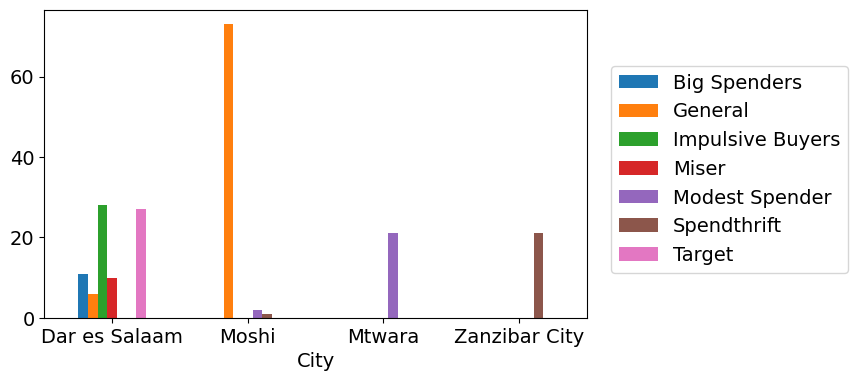

In [69]:
# Cross tabulation between City and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['City'],columns=df['Cluster_Nature'])
print(CrosstabResult)

# Grouped bar chart
CrosstabResult.plot.bar(figsize=(7,4), rot=0)     # rot rotates the x-axis labels by 0 degrees
plt.legend(bbox_to_anchor=(1.5, 0.85))         # bbox_to_anchor specifies the position of the legend relative to the plot. distance from the left and bottom edge.

Cluster_Nature          Big Spenders  General  Impulsive Buyers  Miser  \
Most_Purchased_Product                                                   
Fresh Milk 1ltr                    0       73                 0      0   
Fresh Milk 250ml                   0        0                 0      0   
Mtindi 250ml                      11        6                28     10   
Mtindi 500ml                       0        0                 0      0   

Cluster_Nature          Modest Spender  Spendthrift  Target  
Most_Purchased_Product                                       
Fresh Milk 1ltr                      2            1       0  
Fresh Milk 250ml                     0           21       0  
Mtindi 250ml                         0            0      27  
Mtindi 500ml                        21            0       0  


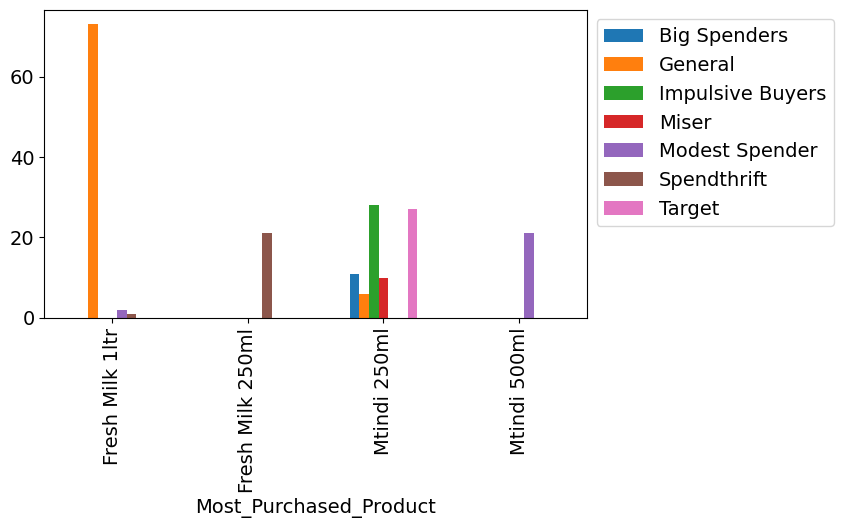

In [70]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['Most_Purchased_Product'],columns=df['Cluster_Nature'])
print(CrosstabResult)

# Grouped bar chart
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

City                    Dar es Salaam  Moshi  Mtwara  Zanzibar City
Most_Purchased_Product                                             
Fresh Milk 1ltr                     0     76       0              0
Fresh Milk 250ml                    0      0       0             21
Mtindi 250ml                       82      0       0              0
Mtindi 500ml                        0      0      21              0


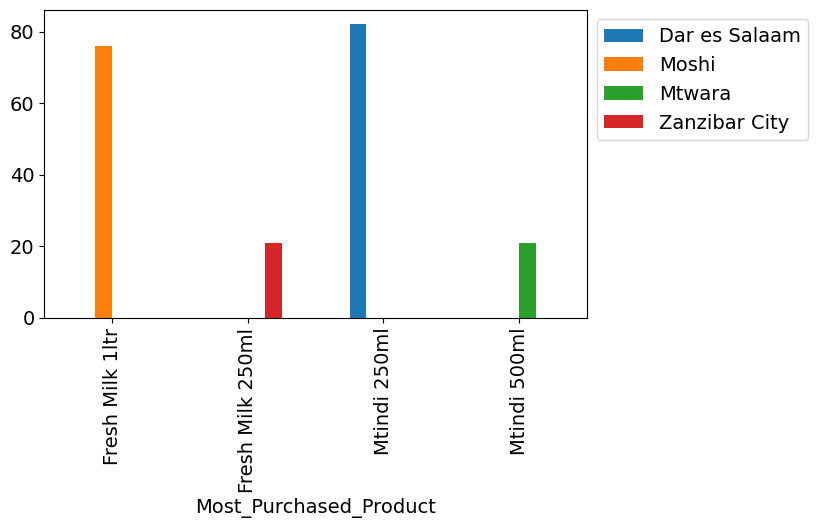

In [71]:
# Cross tabulation between Product and Cluster  Nature
CrosstabResult=pd.crosstab(index=df['Most_Purchased_Product'],columns=df['City'])
print(CrosstabResult)

# Grouped bar chart
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))

                                Annual_Revenue
City          Cluster_Nature                  
Dar es Salaam Big Spenders          108.181818
              General                68.833333
              Impulsive Buyers       78.035714
              Miser                 109.700000
              Target                 79.000000
Moshi         General                53.739726
              Modest Spender         39.000000
              Spendthrift            39.000000
Mtwara        Modest Spender         25.095238
Zanzibar City Spendthrift            25.095238


<Axes: xlabel='City,Cluster_Nature'>

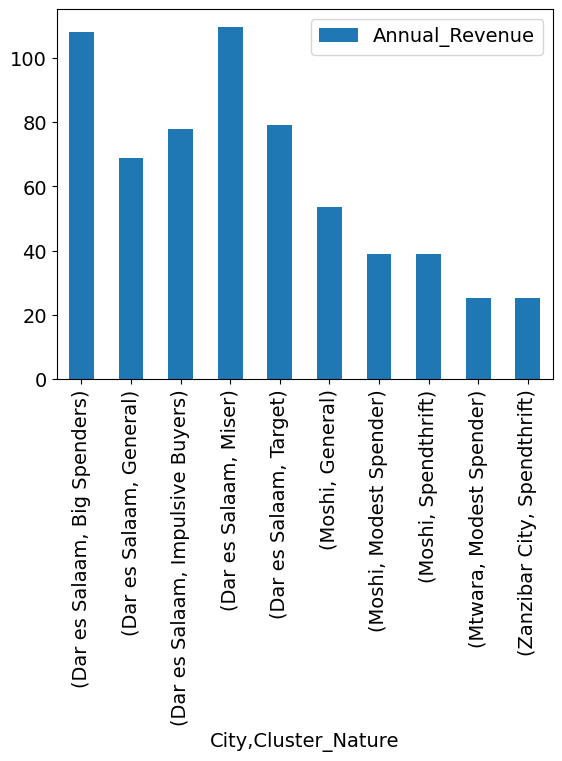

In [72]:
#Pivoit Table on city vs Cluster Nature aggregated by Annual Revenue
table = pd.pivot_table(df,index=['City','Cluster_Nature'],aggfunc={'Annual_Revenue':np.mean})  # showing the mean annual revenue for each combination of city and cluster nature.
print(table)
table.plot(kind='bar')

                                         Annual_Revenue
Most_Purchased_Product Cluster_Nature                  
Fresh Milk 1ltr        General                53.739726
                       Modest Spender         39.000000
                       Spendthrift            39.000000
Fresh Milk 250ml       Spendthrift            25.095238
Mtindi 250ml           Big Spenders          108.181818
                       General                68.833333
                       Impulsive Buyers       78.035714
                       Miser                 109.700000
                       Target                 79.000000
Mtindi 500ml           Modest Spender         25.095238


<Axes: xlabel='Most_Purchased_Product,Cluster_Nature'>

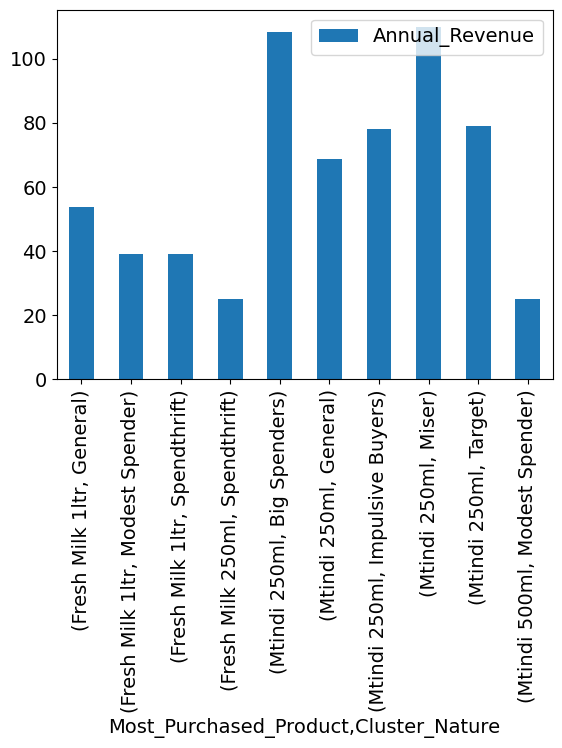

In [73]:
#Pivoit Table on city vs Cluster Nature aggregated by Annual Revenue
table = pd.pivot_table(df,index=['Most_Purchased_Product','Cluster_Nature'],aggfunc={'Annual_Revenue':np.mean})  # showing the mean annual revenue for each combination of city and cluster nature.
print(table)
table.plot(kind='bar')

<Axes: >

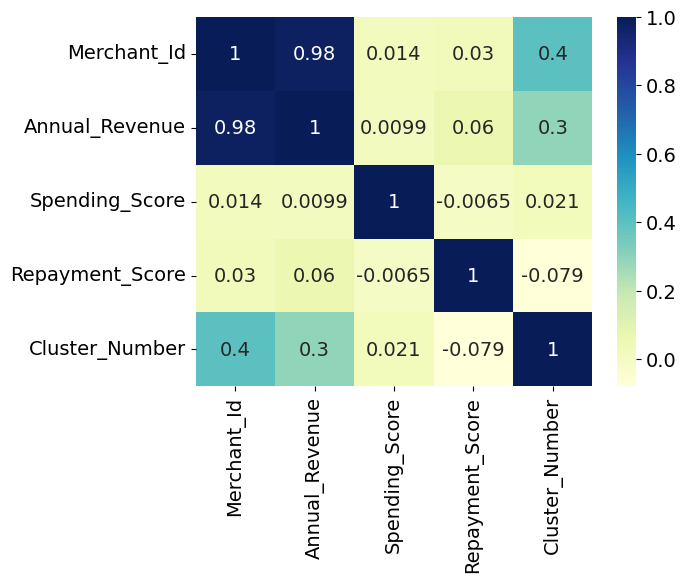

In [74]:
# visualizes the pairwise correlations between numerical columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='YlGnBu')

In [75]:
df.tail(5)

,Merchant_Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment_Score,Cluster_Number,Cluster_Nature,Creditworthiness
195,196,120,79,Dar es Salaam,Mtindi 250ml,4,0,Big Spenders,Highly Creditworthy
196,197,126,28,Dar es Salaam,Mtindi 250ml,3,4,Miser,Moderately Creditworthy
197,198,126,74,Dar es Salaam,Mtindi 250ml,4,0,Big Spenders,Highly Creditworthy
198,199,137,18,Dar es Salaam,Mtindi 250ml,4,4,Miser,Highly Creditworthy
199,200,137,83,Dar es Salaam,Mtindi 250ml,4,0,Big Spenders,Highly Creditworthy


In [77]:
# saving the final analyzed data to a csv file.
df.to_csv('analyzed.csv')

The Creditworthiness column suggests merchant that can be targeted. Each merchant falls under any of the three creditworthy categories (highly, moderately and not creditworthy). The merchant can also be checked along with cluster_nature for better results.

We can also check which merchants are creditworthy and what are their most_purchased product and city